In [1]:
# EDA
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from pingouin import ttest

# ML
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_curve, auc, log_loss, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Otimizacao de Hiperparametros
import optuna


### Carregar os Dados

In [2]:
# Carregar dados para o dataframe
df_frutas = pd.read_csv('dataset/fruit_quality.csv')

In [3]:
# Visualizar Dataframe
df_frutas.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,good
7,7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,good
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad
9,9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,bad


In [4]:
df_frutas.tail(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3990,3990,-1.396794,-0.599596,-1.931104,1.815668,1.670732,1.614027,-0.987968,bad
3991,3991,-4.007762,2.970164,0.218167,-0.492369,1.656375,-2.133895,-4.431321,good
3992,3992,1.764253,-2.079695,-0.083383,-0.086724,-1.703385,3.840101,-0.338261,good
3993,3993,1.520142,-0.352623,-3.206467,1.341719,0.675568,0.107093,-0.945080,bad
3994,3994,1.482508,-2.581181,-0.306888,1.527877,1.056361,2.560829,-1.229255,good
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good
3999,3999,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796,good


In [5]:
# Estrutuura do Dataframe
df_frutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


## EDA

In [6]:
# Como está a distribuição da variálve target - Percentual
px.bar(df_frutas.value_counts('Quality') / len(df_frutas))

In [7]:
# Transformação da variável Quality para numérica
df_frutas['Quality'] = (df_frutas['Quality'] == 'good').astype(int)

In [8]:
df_frutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 281.4 KB


In [9]:
df_frutas.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,0
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,1
7,7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,1
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,0
9,9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,0


In [10]:
# Remover a coluna A_id, pois não tem poder preditivo
df_frutas.drop(columns=['A_id'], inplace=True)

In [11]:
df_frutas.head(10)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,0
6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,1
7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,1
8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,0
9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,0


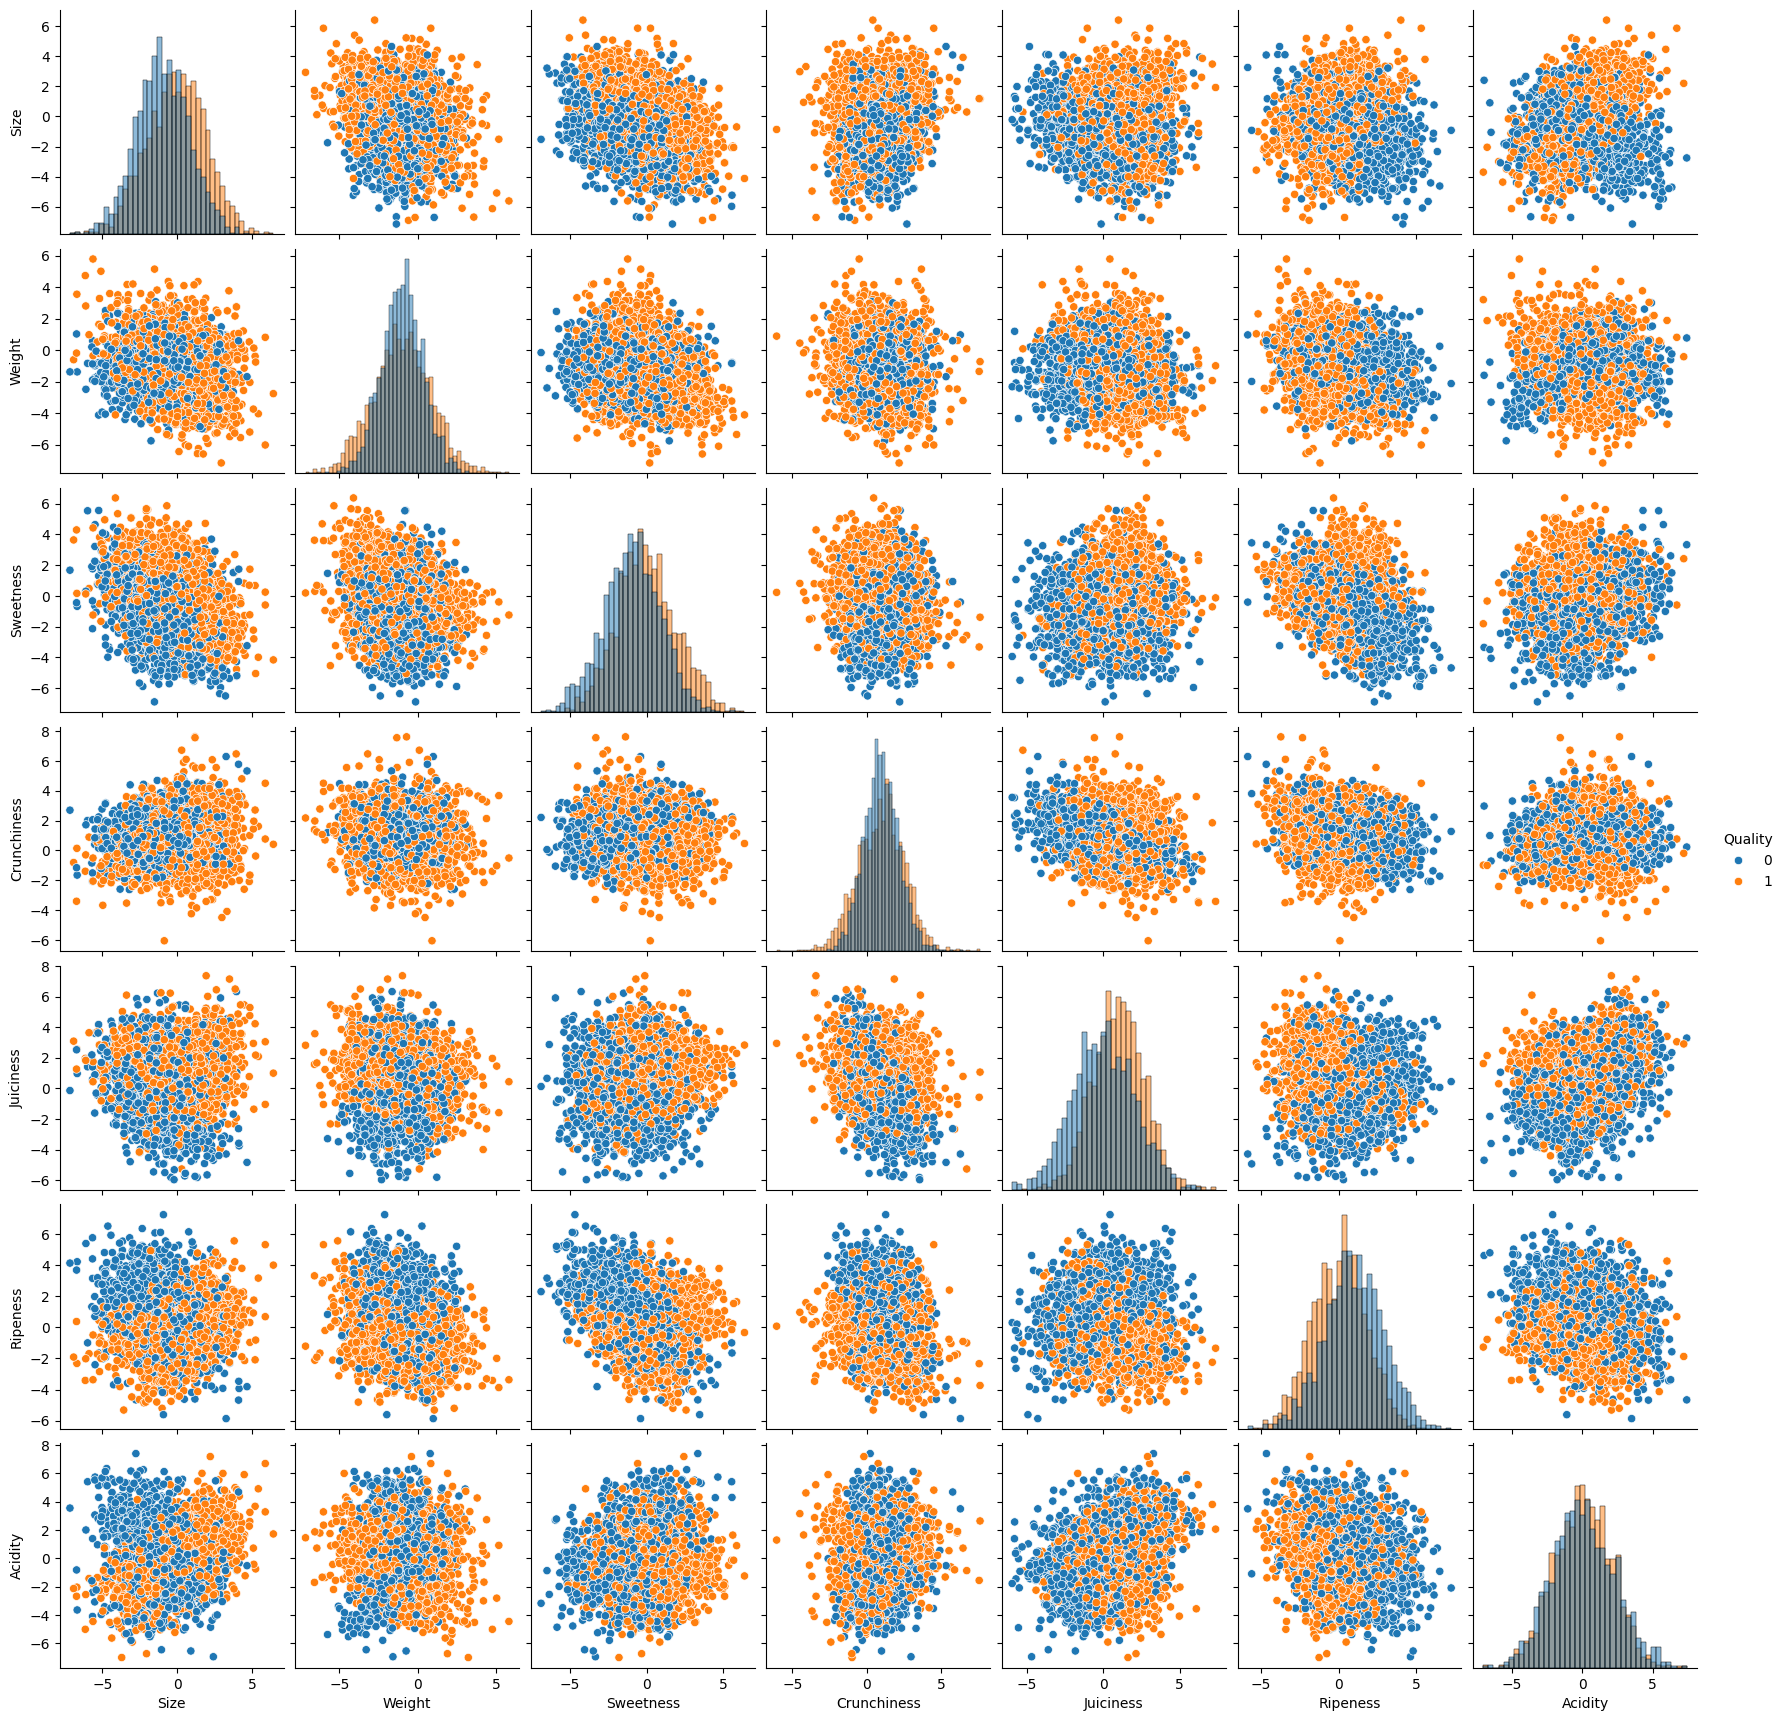

In [12]:
# Verifificar distribuição e as correlações entre as variáveis
sns.pairplot(df_frutas, hue='Quality', diag_kind='hist')

In [13]:
# Boxplot Quality x Weight
px.box(df_frutas, x='Quality', y='Weight', color='Quality', title='Boxplot Quality x Weight')

In [14]:
# Boxplot Quality x Sweetness
px.box(df_frutas, x='Quality', y='Sweetness', color='Quality', title='Boxplot Quality x Sweetness')

In [15]:
# Boxplot Quality x Weight
px.box(df_frutas, x='Quality', y='Weight', color='Quality', title='Boxplot Quality x Sweetness')

In [16]:
# Boxplot Quality x Size
px.box(df_frutas, x='Quality', y='Size', color='Quality', title='Boxplot Quality x Size')

In [17]:
# Teste de T-Student
# Um teste estatístico para verificar se existe uma diferença significativa entre as médias de 2 grupos
# H0: Não há diferença significativa entre as médias
# H1: Existe diferença significativa entre as médias

grupo_good_weight = df_frutas[df_frutas['Quality'] == 1]['Weight']
grupo_bad_weight = df_frutas[df_frutas['Quality'] == 0]['Weight']
ttest(x=grupo_good_weight, y=grupo_bad_weight, paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.089906,3599.742464,two-sided,0.928367,"[-0.09, 0.1]",0.002841,0.036,0.050925


Não há diferença significativa das médias de peso entre frutas boas e ruins

In [18]:
grupo_good_sweetness = df_frutas[df_frutas['Quality'] == 1]['Sweetness']
grupo_bad_sweetness = df_frutas[df_frutas['Quality'] == 0]['Sweetness']
ttest(x=grupo_good_sweetness, y=grupo_bad_sweetness, paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,16.396437,3995.125489,two-sided,1.590329e-58,"[0.86, 1.09]",0.51847,7.576e+54,1.0


Há diferença significativa das médias de doçura entre frutas boas e ruins

In [19]:
grupo_good_size = df_frutas[df_frutas['Quality'] == 1]['Size']
grupo_bad_size = df_frutas[df_frutas['Quality'] == 0]['Size']
ttest(x=grupo_good_size, y=grupo_bad_size, paired=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,15.912978,3951.450727,two-sided,2.602204e-55,"[0.82, 1.06]",0.5031,5.053e+51,NaN


Há diferença significativa das médias de tamanho entre frutas boas e ruins

In [20]:
## Coor Matrix
corr_matrix = df_frutas.corr()
corr_matrix

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,0.244007
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,0.001421
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,0.250998
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,-0.012376
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,0.260223
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,-0.264315
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,-0.007697
Quality,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,-0.007697,1.000000


In [21]:
# Plot Heatmap
fig = go.Figure()
fig.add_trace(
    go.Heatmap(
        x=corr_matrix.columns,
        y=corr_matrix.index,
        z=np.array(corr_matrix),
        text=corr_matrix.values,
        texttemplate='%{text:.2f}',
        colorscale=px.colors.diverging.RdBu,
        zmin=-1,
        zmax=1,
    )
)
fig.show()

## Treinar Modelo Baseline

In [22]:
X = df_frutas.drop(columns=['Quality'], axis=1)
y = df_frutas['Quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [23]:
# Criar o Objeto de ALgoritmo Logistic Regression
# Para datasets pequenos, o solver liblinear é um dos indicados na documentação do sklearn
model_lr = LogisticRegression(solver='liblinear')



In [24]:
# Treinar Modelo
model_lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


### Métricas Baseline

In [25]:
# Retornar a classificação predita com base no conjunto de teste
y_pred = model_lr.predict(X_test)

In [26]:
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [27]:
y_pred[0:10]

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1])

In [28]:
# Decision Function retorna o valor calculado (score) de cada instância, considerando o coeficiente obitdo da reta de regressão
y_decision = model_lr.decision_function(X_test)

In [29]:
y_decision

array([-0.62262518,  0.03737776,  0.24573024, ...,  0.2610187 ,
        0.4326487 , -2.21871192])

In [30]:
# Retornar as probabilidades de cada classes para cada instância no conjunto de teste
y_prob = model_lr.predict_proba(X_test)

In [31]:
y_prob[0:10]


array([[0.65081537, 0.34918463],
       [0.49065665, 0.50934335],
       [0.43887471, 0.56112529],
       [0.88487772, 0.11512228],
       [0.77811982, 0.22188018],
       [0.32949598, 0.67050402],
       [0.68142932, 0.31857068],
       [0.35330422, 0.64669578],
       [0.21303903, 0.78696097],
       [0.11490627, 0.88509373]])

In [32]:
# Retornar os valores da curva ROC - TPR (True Positive Rate) e FPR (False Positive Rate), Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_decision)

In [33]:
# Calcular a AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)
roc_auc

0.8414568425263345

In [34]:
fig = px.area(
    x=fpr,
    y=tpr,
    title=f'Curva ROC (AUC={roc_auc:.4f})',
    labels={'x': 'FPR', 'y': 'TPR'},
    width=700,
    height=500,
)
fig.add_shape(
    type='line',
    line=dict(color='red', dash='dash'),
    x0=0, y0=0,
    x1=1, y1=1,
)
fig.update_yaxes(scaleanchor='x', scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.show()


In [35]:
# Apresentar a importância das Features (co base nos coeficientes obitidos na regressão)
importance = np.abs(model_lr.coef_)
print("Importancia das Features")
for i, feature in enumerate(model_lr.feature_names_in_):
    print(f'{feature}: {importance[0][i]}')

Importancia das Features
Size: 0.6049754259658939
Weight: 0.250178894526485
Sweetness: 0.5488782226573184
Crunchiness: 0.023646688656387926
Juiciness: 0.4354811581239468
Ripeness: 0.12462577365881079
Acidity: 0.2773317065762495


In [36]:
# F1 Score é uma média harmonica entre a precisão e o recall
f1_base_line = f1_score(y_test, y_pred)
f1_base_line

0.7787903893951947

In [37]:
# Apresentar BCE (Binary Cross Entropy)
log_loss(y_test, y_pred)

8.019712879078565

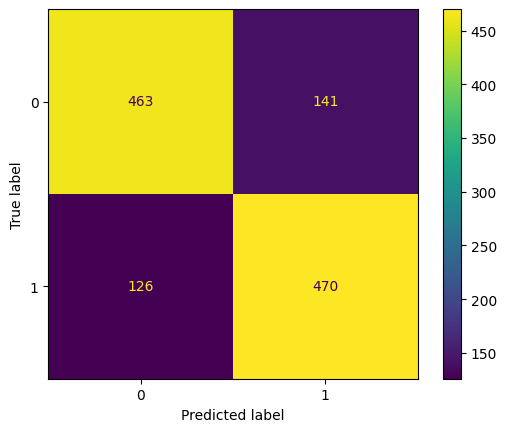

In [38]:
# Mostrar a matriz de confusão
confusion_matrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix, display_labels=model_lr.classes_)
display.plot()

## Otimizar Hiperparametros

In [39]:
# Ajutar Hiperparâmetros com Optuna

# Hiperparâmetro penalty
# Regularização controla a complexidade do modelo, reduzindo o overfitting
# L1 (Ridge) é util para fins de Feature Selection e para modelos esparsos. Soma dos valores absolutos dos coeficientes
# L2 (Lasso) é util para evitar overfitting, pricipalmente quando há multicolinaridade. Soma dos quadrados dos coeficientes

# Hiperparâmetro C
# Valores maiores de C, indica uma regularização mais fraca
# Valores menores de C, indica uma regularização mais forte

def lr_optuna(trial):
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    c_values = trial.suggest_categorical('C', [100, 10, 1.0, 0.1, 0.01])

    # Trinar modelo
    model_lr_optuna = LogisticRegression(solver='liblinear', penalty=penalty, C=c_values)
    model_lr_optuna.fit(X_train, y_train)

    # Retornar a Decision Function
    y_decision_optuna = model_lr_optuna.decision_function(X_test)

    # Calcular curva ROC
    fpr_optuna, tpr_optuna, thresholds_optuna = roc_curve(y_test, y_decision_optuna)
    roc_auc_optuna = auc(fpr_optuna, tpr_optuna)
    
    # Retornar predição
    y_pred_optuna = model_lr_optuna.predict(X_test)
    f1_score_optuna = f1_score(y_test, y_pred_optuna, average='macro')
    
    # Calcular BCE
    log_loss_optuna = log_loss(y_test, y_pred_optuna)
    return roc_auc_optuna, f1_score_optuna, log_loss_optuna



In [40]:
# Criação do estudo e rodar otimizador
search_space = {
    'penalty': ['l1', 'l2'],
    'C': [100, 10, 1.0, 0.1, 0.01]
}
sampler = optuna.samplers.GridSampler(search_space=search_space)
estudo_lr = optuna.create_study(directions=['maximize', 'maximize', 'minimize'], sampler=sampler)
estudo_lr.optimize(lr_optuna, n_trials=10)

[I 2025-10-19 00:29:27,966] A new study created in memory with name: no-name-715e6489-79f1-4327-b348-d12f37a376ed
[I 2025-10-19 00:29:28,006] Trial 0 finished with values: [0.8414235077114538, 0.7774924285618052, 8.019712879078565] and parameters: {'penalty': 'l1', 'C': 10}.
[I 2025-10-19 00:29:28,032] Trial 1 finished with values: [0.8245866482954799, 0.7412621911352295, 9.281240747697666] and parameters: {'penalty': 'l1', 'C': 0.01}.
[I 2025-10-19 00:29:28,061] Trial 2 finished with values: [0.8414012845015334, 0.7766610831937465, 8.04974925690283] and parameters: {'penalty': 'l1', 'C': 1.0}.
[I 2025-10-19 00:29:28,086] Trial 3 finished with values: [0.8383150362238322, 0.7657746143303981, 8.440222168618266] and parameters: {'penalty': 'l2', 'C': 0.01}.
[I 2025-10-19 00:29:28,110] Trial 4 finished with values: [0.8414207298102137, 0.7774924285618052, 8.019712879078565] and parameters: {'penalty': 'l2', 'C': 100}.
[I 2025-10-19 00:29:28,133] Trial 5 finished with values: [0.8408595937

In [41]:
# Mostrar melhor resultado e melhor conjunto de hiperparâmetros
melhor_trial = max(estudo_lr.best_trials, key=lambda t: t.values[1])
print("Trial com melhor AUC, F1 e menor BCE:")
print(f'\tnumber: {melhor_trial.number}')
print(f"params: {melhor_trial.params}")
print(f"values: {melhor_trial.values}")

Trial com melhor AUC, F1 e menor BCE:
	number: 6
params: {'penalty': 'l2', 'C': 0.1}
values: [0.84122349882217, 0.7774998454860038, 8.019712879078567]


In [42]:
# Mostrar Chat com Trials do Estudo
fig = optuna.visualization.plot_pareto_front(estudo_lr)
fig.show()

In [43]:
# Comparação entre melhor resultado da otimização e baseline
print(f"AUC: baseline={roc_auc} vs optuna={melhor_trial.values[0]}")
print(f"F1: baseline={f1_base_line} vs optuna={melhor_trial.values[1]}")
print(f"BCE: baseline={log_loss(y_test, y_pred)} vs optuna={melhor_trial.values[2]}")

AUC: baseline=0.8414568425263345 vs optuna=0.84122349882217
F1: baseline=0.7787903893951947 vs optuna=0.7774998454860038
BCE: baseline=8.019712879078565 vs optuna=8.019712879078567


### Verificar métricas com Thresholds diferentes

In [44]:
# Fazer um loop e apresentar o F1 Score para cada Threshold
# Utilizaremos o modelo baseline
list_thresholds = [0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
list_resultados = {'cenario': ['baseline'], 'resultado': [f1_base_line]}

for novo_threshold in list_thresholds:
    y_pred_threshold = (model_lr.predict_proba(X_test)[:, 1] >= novo_threshold).astype(int)
    f1_score_threshold = f1_score(y_test, y_pred_threshold, average='macro')
    list_resultados['cenario'].append(str(novo_threshold))
    list_resultados['resultado'].append(f1_score_threshold)

In [45]:
# Criar dataframe com os resultados
df_resultados_threshold = pd.DataFrame(list_resultados)
df_resultados_threshold


,cenario,resultado
0,baseline,0.778790
1,0.55,0.758622
2,0.6,0.749562
3,0.65,0.720718
4,0.7,0.688131
5,0.75,0.656890
6,0.8,0.614942
7,0.85,0.548762
8,0.9,0.443542


In [46]:
# apresentar resultados dos F1 scores
px.line(df_resultados_threshold, x='cenario', y='resultado', title='F1 Score para cada Threshold', markers=True)

# Salvar modelo

In [47]:
# Salvar o modelo
import joblib

joblib.dump(model_lr, 'model_qualidade_frutas.pkl')

['model_qualidade_frutas.pkl']